In [37]:
import numpy as np

force_data = np.load('data/GroundLink_dataset/force/s001_force/s001/s001_20220513_ballethighleg_1.npy', allow_pickle=True).item()

cop = force_data['CoP']
grf = force_data['GRF']# * 685.3266

cop.shape # (framecount, 2, 3)
grf.shape # (framecount, 2, 3)

torch.Size([5731, 2, 3])

In [38]:
import ezc3d

c3d = ezc3d.c3d('data/GroundLink_dataset/mocap/s001_20220513/s001_20220513_ballethighleg_1.c3d')
c3d.keys() # ['header', 'parameters', 'data']
c3d['data'].keys() # ['points', 'meta_points', 'analogs', 'rotations']
c3d['data']['points'].shape # (4,99,framecount)

# c3d['data']['points'][3] is all 1's so not useful

(4, 99, 5731)

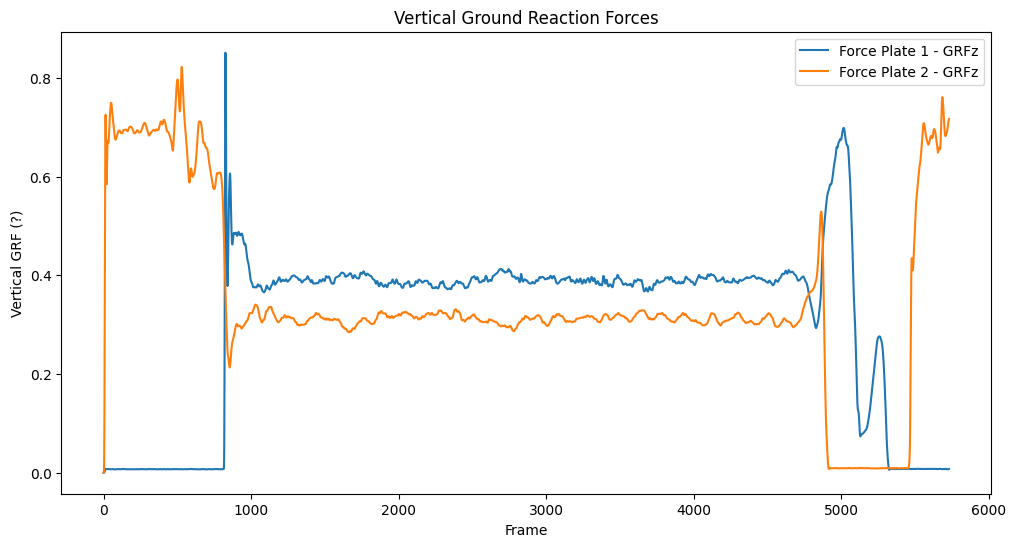

In [42]:
import matplotlib.pyplot as plt

# Plot the vertical GRF (z-component) for both force plates
plt.figure(figsize=(12, 6))
plt.plot(grf[:, 0, 2].numpy(), label='Force Plate 1 - GRFz')
plt.plot(grf[:, 1, 2].numpy(), label='Force Plate 2 - GRFz')
plt.xlabel('Frame')
plt.ylabel('Vertical GRF (?)')
plt.title('Vertical Ground Reaction Forces')
plt.legend()
plt.show()